<a href="https://colab.research.google.com/github/MAJJJY/AIFFEL_Online_Quest/blob/main/Project/Project03(Deeplearning)/Project03(Deeplearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##** Boston 주택 가격 예측 모델**

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis = 0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis = 0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data - mean
test_data = test_data / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'Adam',
              loss = 'mse',
              metrics = 'mae')

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(train_data, train_labels,
                    batch_size = 512,
                    epochs = 500,
                    validation_split=0.2)

Epoch 1/500
1/1 [==============================] - 1s 731ms/step - loss: 585.6564 - mae: 22.4200 - val_loss: 652.0981 - val_mae: 23.8181
Epoch 2/500
1/1 [==============================] - 0s 27ms/step - loss: 581.3232 - mae: 22.3218 - val_loss: 647.6257 - val_mae: 23.7234
Epoch 3/500
1/1 [==============================] - 0s 28ms/step - loss: 577.0174 - mae: 22.2235 - val_loss: 643.2069 - val_mae: 23.6295
Epoch 4/500
1/1 [==============================] - 0s 26ms/step - loss: 572.7443 - mae: 22.1253 - val_loss: 638.8027 - val_mae: 23.5356
Epoch 5/500
1/1 [==============================] - 0s 29ms/step - loss: 568.4941 - mae: 22.0270 - val_loss: 634.3982 - val_mae: 23.4413
Epoch 6/500
1/1 [==============================] - 0s 30ms/step - loss: 564.2651 - mae: 21.9284 - val_loss: 629.9663 - val_mae: 23.3459
Epoch 7/500
1/1 [==============================] - 0s 35ms/step - loss: 560.0202 - mae: 21.8293 - val_loss: 625.5240 - val_mae: 23.2499
Epoch 8/500
1/1 [==============================

<ipython-input-6-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


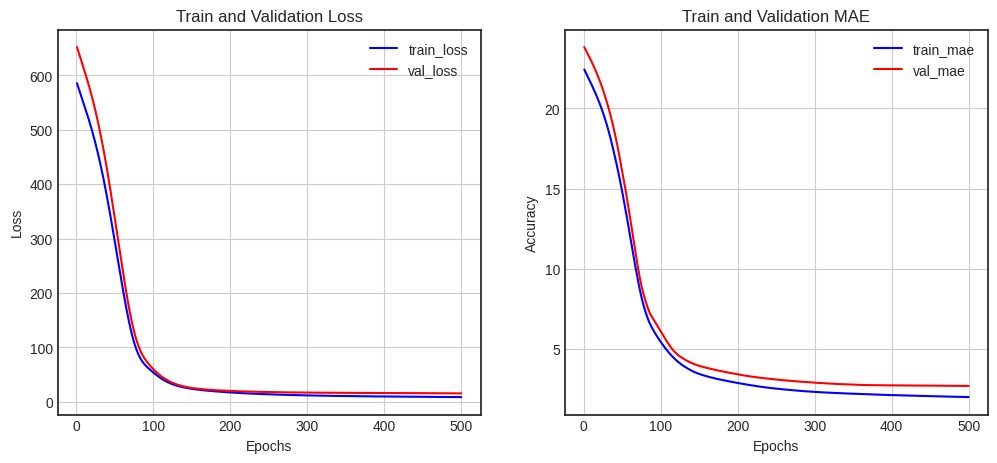

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 26.5059 - mae: 3.2028
3.2028024196624756


##** Reuters 딥러닝 모델**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(traind, trainl), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data,train_labels, val_labels = train_test_split(traind,trainl, test_size = 0.25, random_state = 809)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  # [[YOUR CODE]]
  results = np.zeros((len(data), dim))
  for i, sequence in enumerate(data):
      results[i, sequence] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)  # 만약 val_labels가 있다면
y_test = utils.to_categorical(test_labels)

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                      

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
checkpoint = callbacks.ModelCheckpoint('best_model.h5',monitor='val_loss', save_best_only = True)

earlystopping = callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
history = model.fit(x_train,y_train,
          batch_size = 512,
          epochs = 200,
          callbacks = [checkpoint, earlystopping],
          validation_data = (x_val,y_val))

Epoch 1/200
14/14 [==============================] - 3s 85ms/step - loss: 3.0481 - accuracy: 0.3314 - val_loss: 3.5047 - val_accuracy: 0.6247
Epoch 2/200
14/14 [==============================] - 1s 68ms/step - loss: 1.4701 - accuracy: 0.7142 - val_loss: 3.1170 - val_accuracy: 0.7159
Epoch 3/200
14/14 [==============================] - 1s 65ms/step - loss: 1.0278 - accuracy: 0.7735 - val_loss: 2.8990 - val_accuracy: 0.7431
Epoch 4/200
14/14 [==============================] - 1s 66ms/step - loss: 0.7679 - accuracy: 0.8287 - val_loss: 2.7611 - val_accuracy: 0.7427
Epoch 5/200
14/14 [==============================] - 1s 68ms/step - loss: 0.5956 - accuracy: 0.8704 - val_loss: 2.5603 - val_accuracy: 0.7413
Epoch 6/200
14/14 [==============================] - 1s 94ms/step - loss: 0.4647 - accuracy: 0.8999 - val_loss: 2.3945 - val_accuracy: 0.7097
Epoch 7/200
14/14 [==============================] - 1s 81ms/step - loss: 0.3658 - accuracy: 0.9237 - val_loss: 2.2050 - val_accuracy: 0.7173
Epoch 

<ipython-input-15-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


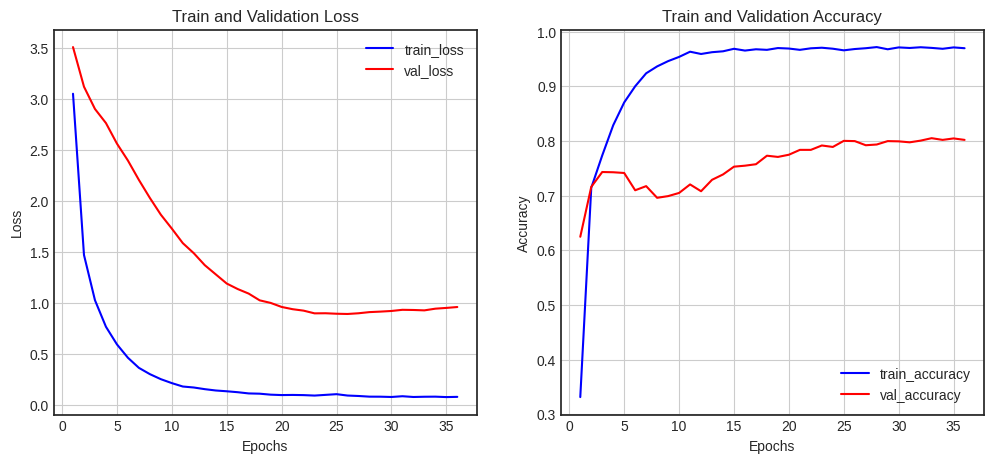

In [15]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [16]:
test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

71/71 [==============================] - 0s 5ms/step - loss: 1.0751 - accuracy: 0.7983
[1.0751005411148071, 0.7983080744743347]


## **CIFAR10 딥러닝 모델**

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [18]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(x_train_full, y_train_full),(x_test,y_test) = cifar10.load_data()
x_train,x_val, y_train, y_val = train_test_split(x_train_full,y_train_full,test_size = 0.2, random_state= 809)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [19]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-20-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


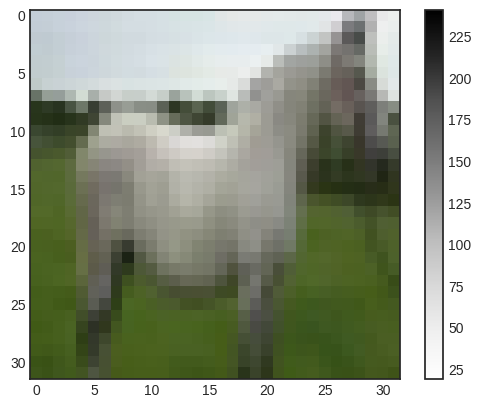

In [20]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [21]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
y_val = utils.to_categorical(y_val)
# [[YOUR CODE]]
x_train = x_train.reshape((x_train.shape[0], 3072))
x_val = x_val.reshape((x_val.shape[0], 3072))
x_test = x_test.reshape((x_test.shape[0], 3072))

print(y_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 10)
(10000, 3072)
(10000, 3072)


In [23]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [24]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(2048,input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                      

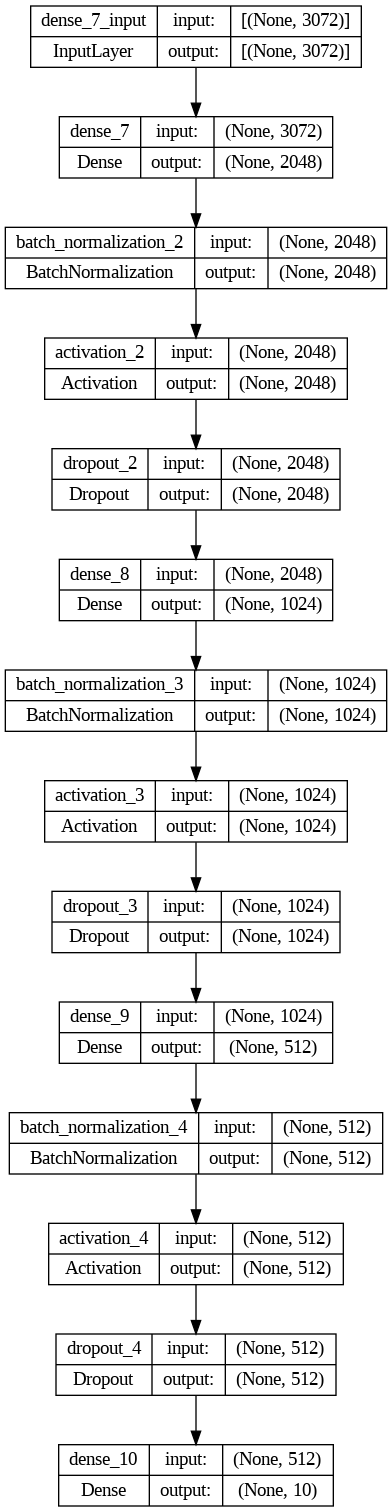

In [26]:
utils.plot_model(model, show_shapes=True)

In [27]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
checkpoint = callbacks.ModelCheckpoint('best_model_cifar.h5',monitor='val_loss', save_best_only = True)

earlystopping = callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
          batch_size = 512,
          epochs = 200,
          callbacks = [checkpoint, earlystopping],
          validation_data = (x_val,y_val))

Epoch 1/200
79/79 [==============================] - 35s 431ms/step - loss: 1.8065 - accuracy: 0.3666 - val_loss: 3.6940 - val_accuracy: 0.2019
Epoch 2/200
79/79 [==============================] - 32s 403ms/step - loss: 1.5269 - accuracy: 0.4558 - val_loss: 2.1776 - val_accuracy: 0.2956
Epoch 3/200
79/79 [==============================] - 32s 410ms/step - loss: 1.4012 - accuracy: 0.4983 - val_loss: 1.8445 - val_accuracy: 0.3454
Epoch 4/200
79/79 [==============================] - 39s 500ms/step - loss: 1.3114 - accuracy: 0.5328 - val_loss: 1.8302 - val_accuracy: 0.3648
Epoch 5/200
79/79 [==============================] - 32s 411ms/step - loss: 1.2361 - accuracy: 0.5581 - val_loss: 1.9348 - val_accuracy: 0.3435
Epoch 6/200
79/79 [==============================] - 35s 449ms/step - loss: 1.1732 - accuracy: 0.5789 - val_loss: 1.7316 - val_accuracy: 0.3781
Epoch 7/200
79/79 [==============================] - 37s 465ms/step - loss: 1.1123 - accuracy: 0.6018 - val_loss: 1.9097 - val_accuracy:

<ipython-input-28-3cd8401d05cb>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


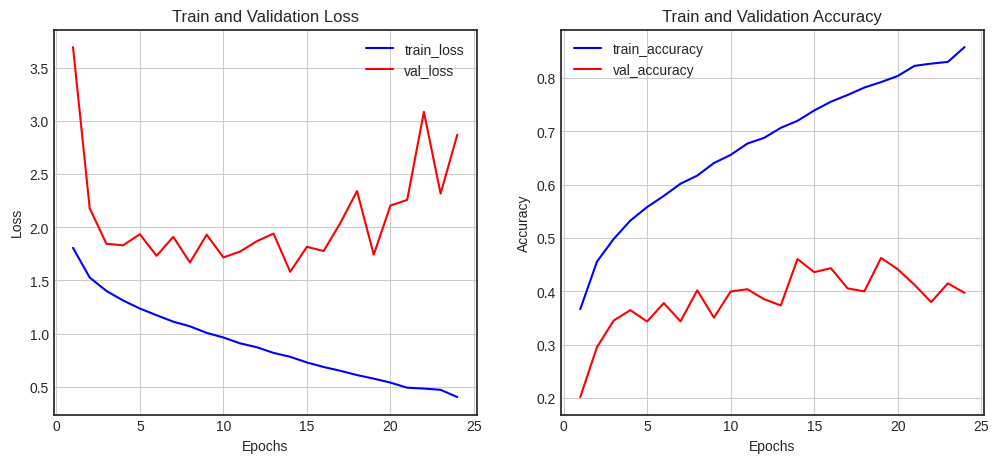

In [28]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [29]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 2.8836 - accuracy: 0.3906


[2.8835573196411133, 0.3905999958515167]